# **Problem 2**

Extend [the notebook for solving linear regression using stochastic gradient descent](https://colab.research.google.com/drive/1ZKa5sIiSgS8P1RuNyH6yYcZ6F9S7Yiwu) to the case where there are two weights w1 and w2 and one bias term b.  

In [0]:
# Import libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [0]:
# Generate random test data
np.random.seed(42)

total_vals = 100
max_x = 2 
x1_values = max_x * np.random.rand(total_vals, 1)
x2_values = max_x * np.random.rand(total_vals, 1)

gt_bias = 8
gt_w1 = 7
gt_w2 = 4
y_values = gt_bias + (gt_w1 * x1_values) + (gt_w2 * x2_values) + np.random.rand(total_vals, 1)

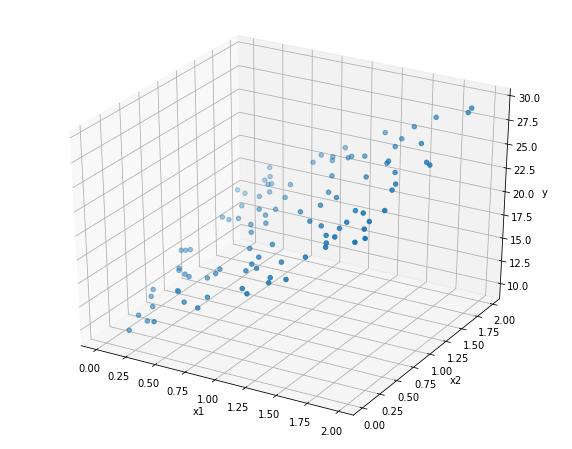

In [3]:
# Plot the data
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
scatterplot = ax.scatter3D(x1_values, x2_values, y_values)

In [0]:
# Split the data into training (80%) and test sets (20%)
train_share = int(len(x1_values) * 0.80)
test_share = total_vals - train_share

train_x1s = x1_values[:train_share]
train_x2s = x2_values[:train_share]
train_ys = y_values[:train_share]

test_x1s = x1_values[train_share:]
test_x2s = x2_values[train_share:]
test_ys = y_values[train_share:]

In [0]:
# Initial Linear Regression
epochs = 10
lr = 0.01
w1 = np.random.randn(1)
w2 = np.random.randn(1)
b  = np.zeros(1)

In [0]:
# Run our experiment, calculating our weights w1, w2 and our bias b
for epoch in np.arange(epochs):
  for i in np.arange(train_share):
    y_pred = w1 * train_x1s[i] + w2 * train_x2s[i] + b

    grad_w1 = (y_pred - train_ys[i]) * train_x1s[i]
    grad_w2 = (y_pred - train_ys[i]) * train_x2s[i]
    grad_b = (y_pred - train_ys[i])

    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
    b -= lr * grad_b

In [7]:
# Test our weights against the test dataset
test_loss = 0
for i in np.arange(test_share):
  test_loss += 0.5 * ((w1 * test_x1s[i] + w2 * test_x2s[i] + b) - test_ys[i]) ** 2
test_loss /= test_share
print (test_loss)

[0.09375663]


In [0]:
# Generate predicted y's based on test x values
pred_ys = w1 * test_x1s + w2 * test_x2s + b

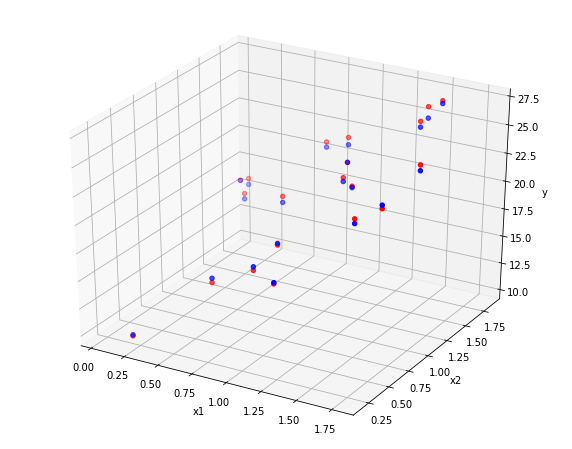

In [9]:
# Plot the data, predictions are red and true values are blue
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
scatterplot = ax.scatter3D(test_x1s, test_x2s, test_ys, color="blue")
scatterplot = ax.scatter3D(test_x1s, test_x2s, pred_ys, color="red")

In [17]:
print("Calculated values", (w1[0], w2[0], b[0]))
print("Ground truth ", (gt_w1, gt_w2, gt_bias))

Calculated values (7.286195274530998, 4.4815992432898195, 7.765539314551261)
Ground truth  (7, 4, 8)
